Importação das bibliotecas

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd

# Conversão de dados categóricos em numéricos
from sklearn.preprocessing import LabelEncoder

# Algoritmos de classificação
# KNN (K-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Seleção de dados de treino e teste
from sklearn.model_selection import train_test_split

# Obtenção da acurácia do modelo
from sklearn.metrics import accuracy_score

Importação dos dados

In [ ]:
# Criar um Data Frame a partir do arquivo de dados
dados = pd.read_csv('diamonds.csv')

Análise Exploratória

In [ ]:
# Visualizar as primeiras linhas
dados.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


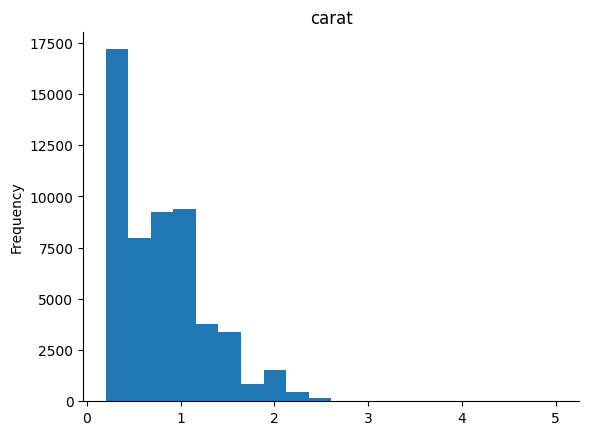

In [ ]:
# @title carat

from matplotlib import pyplot as plt
dados['carat'].plot(kind='hist', bins=20, title='carat')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Visualizar as últimas linhas
dados.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
# Quantas linhas e colunas tem o Data Frame?
dados.shape

(53940, 11)

In [ ]:
# Estatísticas descritivas
dados.describe().round(3)

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000,53940.000,53940.000,53940.000,53940.00,53940.000,53940.000,53940.000
mean,26970.500,0.798,61.749,57.457,3932.80,5.731,5.735,3.539
std,15571.281,0.474,1.433,2.234,3989.44,1.122,1.142,0.706
min,1.000,0.200,43.000,43.000,326.00,0.000,0.000,0.000
25%,13485.750,0.400,61.000,56.000,950.00,4.710,4.720,2.910
50%,26970.500,0.700,61.800,57.000,2401.00,5.700,5.710,3.530
75%,40455.250,1.040,62.500,59.000,5324.25,6.540,6.540,4.040
max,53940.000,5.010,79.000,95.000,18823.00,10.740,58.900,31.800


In [ ]:
# Nomes das colunas
dados.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
# Informações do formato de dados das colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# Seleção dos dados de uma coluna (formato Series)
serie = dados['price']
serie

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [ ]:
type(serie)

In [ ]:
# Seleção dos dados de uma coluna (formato Data Frame)
df = dados[['price']]
df

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [ ]:
type(df)

In [ ]:
dados.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [ ]:
# Exclusão de uma coluna
# Excluindo coluna 'Unnamed: 0'
# axis = 1 ---> coluna
# axis = 0 ---> linha
dados = dados.drop('Unnamed: 0', axis=1)

In [ ]:
dados.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Cálculo de média aritmética dos valores de uma coluna
media_preco = dados['price'].mean().round(4)
media_preco

3932.7997

In [ ]:
# Cálculo de mediana dos valores de uma coluna
mediana_preco = dados['price'].median().round(4)
mediana_preco

2401.0

In [ ]:
# Cálculo do desvio padrão dos valores de uma coluna
desvio_padrao_preco = dados['price'].std().round(4)
desvio_padrao_preco

3989.4397

In [ ]:
# Dados de uma coluna no formato Numpy Array (Vetor)
vetor_preco = dados['price'].values
vetor_preco

array([ 326,  326,  327, ..., 2757, 2757, 2757])

In [ ]:
type(vetor_preco)

numpy.ndarray

Pré Processamento

In [ ]:
dados.info()

In [ ]:
dados['cut'].values

array(['Ideal', 'Premium', 'Good', ..., 'Very Good', 'Premium', 'Ideal'],
      dtype=object)

In [ ]:
# Conversão de uma coluna de dados categóricos para dados numéricos
le = LabelEncoder()
dados['cut'] = le.fit_transform(dados['cut'])

In [ ]:
dados['cut'].values

array([2, 3, 1, ..., 4, 3, 2])

In [ ]:
dados.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [ ]:
# Separação dos dados de entrada e dados de saída usando método .iloc
# Dados de entrada ----> X
# Dados de saída ---> y
# .iloc ---> [linhas, colunas] por índice
# .loc ---> [linhas, colunas] por rótulo
X = dados.iloc[:,7:]
X

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
2,4.05,4.07,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75
...,...,...,...
53935,5.75,5.76,3.50
53936,5.69,5.75,3.61
53937,5.66,5.68,3.56
53938,6.15,6.12,3.74


In [ ]:
X.values

array([[3.95, 3.98, 2.43],
       [3.89, 3.84, 2.31],
       [4.05, 4.07, 2.31],
       ...,
       [5.66, 5.68, 3.56],
       [6.15, 6.12, 3.74],
       [5.83, 5.87, 3.64]])

In [ ]:
# Separação em dados de treino e dados de teste


In [ ]:
# Tamanho do conjunto de treino


In [ ]:
# Tamanho do conjunto de teste


Escolha do algoritmo

In [ ]:
# Instanciar o modelo


In [ ]:
# Treinar o modelo


Avaliar o modelo com base na acurácia

In [ ]:
#

EXERCÍCIO: Treine um outro modelo usando o algoritmo Decision Tree e compare as métricas